In [145]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [146]:
df=pd.read_csv("train.csv")

In [147]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [148]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['survived'] = df['Survived']

In [149]:
#dropping survived column
y=X['survived']
X=X.drop(['survived'], axis=1)

In [150]:

X['sex']= pd.get_dummies(X.sex)['female']

In [151]:
#applying one hot encoding to pclass
X=X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
X=X.drop(['pclass_1', 'pclass'], axis=1)

In [152]:
X

,sex,age,sibsp,parch,pclass_2,pclass_3
0,0.0,22.0,1,0,0.0,1.0
1,1.0,38.0,1,0,0.0,0.0
2,1.0,26.0,0,0,0.0,1.0
3,1.0,35.0,1,0,0.0,0.0
4,0.0,35.0,0,0,0.0,1.0
5,0.0,NaN,0,0,0.0,1.0
6,0.0,54.0,0,0,0.0,0.0
7,0.0,2.0,3,1,0.0,1.0
8,1.0,27.0,0,2,0.0,1.0
9,1.0,14.0,1,0,1.0,0.0


In [153]:
#filling na values with mean of Age
meanAge=X['age'].mean()
X['age']=X['age'].fillna(meanAge)

In [154]:
#Scaling the dataset
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [155]:
#building test and training sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(penalty='l2', C=10)

In [141]:
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [156]:
#Logistic AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

print "\n\n---Logistic Model---"
logit_roc_auc=roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC= %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC= 0.81
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       105
          1       0.82      0.73      0.77        74

avg / total       0.82      0.82      0.82       179



In [157]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(y_test, model.predict_proba(X_test)[:,1])

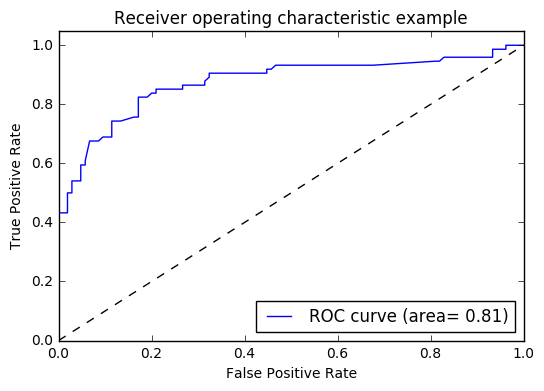

In [158]:
#ROC curve plot
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1],[0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()